# 《按图索骥学机器学习》-《A01什么是机器学习》

这是《按图索骥学机器学习》-《A01什么是机器学习》的讲义
这门课程之所以叫按图索骥，是因为学习资料都放到了思维导图当中，大家可以根据自己的情况，选择合适的学习路径，自主学习

![avatar](pic/swnt.png)

导图和有关学习资料都放在了github(git.code946.com)上，并且在不断迭代和更新中

## 1、传统编程模式

In [1]:
radius = 2 # 圆半径
circle = 2 * 3.14 * radius # 圆形周长2*PI*半径r
print("半径为%d的圆形周长为：%f" % (radius,circle))

半径为2的圆形周长为：12.560000


程序 = 数据结构 + 算法
数据结构：数值型---圆半径
算法：圆周长 = 2 * PI * 半径

## 2、机器学习模型推导圆周长公式

第一步：加载数据，绘制图形

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

zhfont1 = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simkai.ttf')

In [3]:
circular_train = pd.read_csv("circle.csv")

In [4]:
circular_train

,diameter,circle
0,1.60,3.92
1,3.95,11.46
2,7.16,22.43
3,9.65,29.54
4,4.93,13.65
...,...,...
95,6.35,21.40
96,9.62,30.80
97,6.39,20.70
98,10.12,31.92


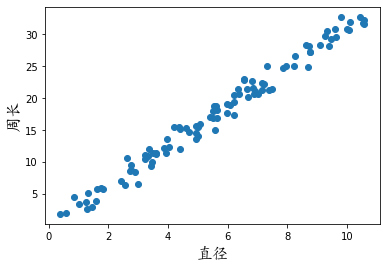

In [5]:
plt.xlabel("直径",fontproperties=zhfont1,fontsize=16)
plt.ylabel("周长",fontproperties=zhfont1,fontsize=16)
plt.scatter(circular_train["diameter"],circular_train["circle"])

直径和周长是呈线性关系
帮助选择合适的机器学习的模型，去总结圆周长的计算公式
线性回归的算法模型

第二步：引入sk-learn框架，调用LinearRegression模型

In [6]:
from sklearn.linear_model import LinearRegression

第三步：训练模型

In [7]:
lr = LinearRegression()
lr.fit(circular_train["diameter"].values.reshape(-1,1),circular_train["circle"]) 
# fit方法第一个参数要求多维数组，但是diameter只有一列，所以做个转换，这种情况极其罕见，照做就可以了

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

当fit方法执行完毕后，模型已经训练完毕
通过散点图上的可视化信息，了解到模型的训练结果，是一条直线，直线方程中重要的两个数据：斜率和截距

In [8]:
print(lr.coef_) # 斜率
print(lr.intercept_) # 截距

[3.09316678]
0.19481389957470086


圆周长数学计算公式；周长 = PI * 直径 + 0
模型推导出的公式：周长 = lr.coef_ * 直径 + lr.intercept_
lr.coef对应的就是PI
这里误差：原始数据是有误差的

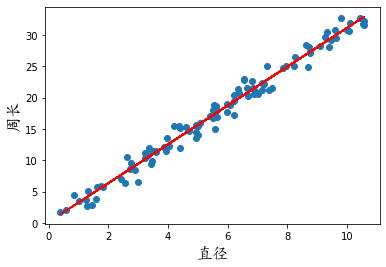

In [11]:
plt.xlabel("直径",fontproperties=zhfont1,fontsize=16)
plt.ylabel("周长",fontproperties=zhfont1,fontsize=16)
plt.scatter(circular_train["diameter"],circular_train["circle"])

plt.plot(circular_train["diameter"],lr.coef_*circular_train["diameter"]+lr.intercept_,color="r")
plt.show()

## 3、模型评估

专门用于对模型进行评估的数据，测试数据
注意：生成的测试数据是精确值，目的是为了看到真实的误差值，但是实际情况是不一样的
实际上，测试数据和训练模型数据，来源是一样的，也是有误差的

In [ ]:
d = np.arange(10,100,10)
circular_test = {
    'diameter': d,
    'circle': 3.14*d
}
circular_test

In [ ]:
print(lr.coef_ * 10 + lr.intercept_)

In [ ]:
lr.score(circular_test["diameter"].reshape(-1,1),circular_test["circle"])

score的分值越接近于1，代表模型越好，误差值越小
score的计算公式，暂时不管

## 4、传统编程模式 VS 机器学习编程模式

### 4.1、传统编程模式

![avatar](pic/ctbc.png)

传统编程模式是基于规则和数据的，目的是通过计算机的运算能力，快速的得到一个答案
计算机程序 = 算法 + 数据结构

### 4.2、机器学习编程模式

![avatar](pic/jqxx.png)

机器学习的模式：从已知的数据和答案出发，找出其中的规则，接下来就可以利用处理新数据
得出的规则有误差：得到更加精确的数据，挑选更加合适的算法
误差并不可怕，工程实践中有误差是很普遍事情，只要误差的范围能够接受就可以了，例如：PI无理数